<a href="https://colab.research.google.com/github/MJaiman/Data-Analytics/blob/main/Finance_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#### as data is in the form of excel, use read_excel command

In [2]:
df=pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Perform Exploratory Data Analysis

In [3]:
df.shape

(5000, 14)

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.drop(['ID','ZIP Code'],inplace=True,axis=1)

In [6]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
import plotly.express as px

In [8]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [9]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1 MB 4.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [10]:
import plotly.graph_objects as go
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy



In [11]:
columns=['Age', 'Experience', 'Income', 'Family', 'Education']
fig = go.Figure()
for col in columns:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

#### Five point summary suggest that Experience has negative value(This should be fixed). for above box  plot

we can see the Min, Max, mean and std deviation for all key attributes of the dataset
Income has too much noise and slightly skewed right, Age and exp are equally distributed. 


In [12]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [13]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### now visualise Skewness by distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6265126090>,
      dtype=object)

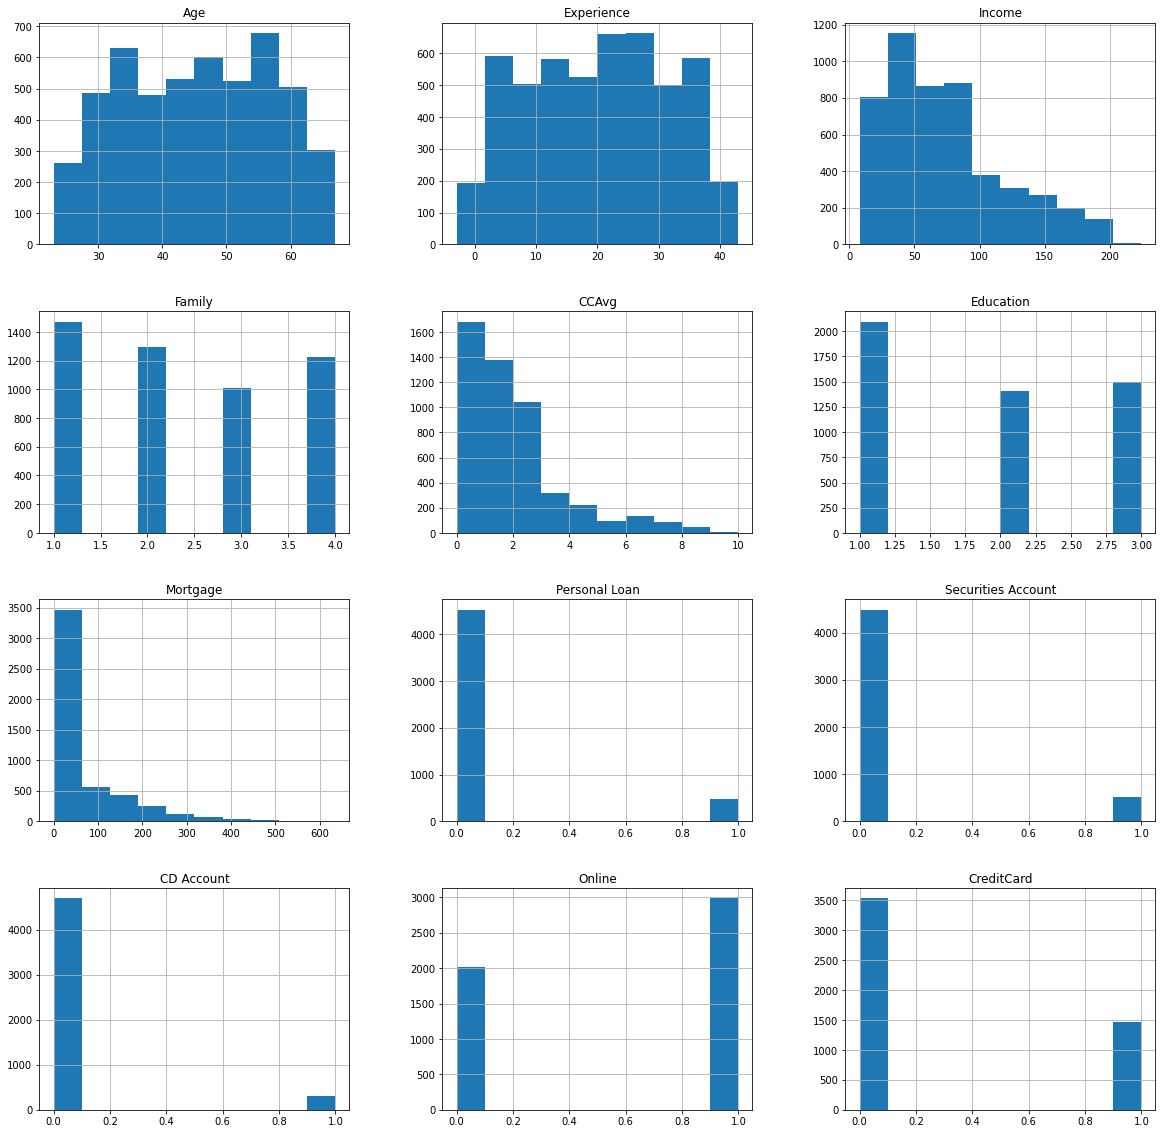

In [14]:
df.hist(figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



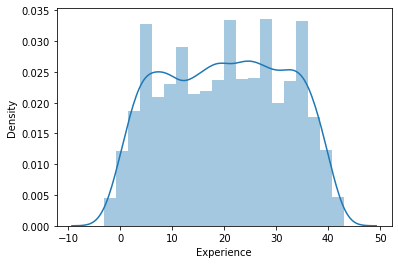

In [15]:
sns.distplot(df['Experience'])


#### INFERENCE from Histogram
    1.Age & Experience are to an extent equally distributed
    2.Income & Credit card spending are skewed to the left
    3.We have more Undergraduates than Graduate and Advanced & Professional
    4.60% of customers have enabled online banking and went digital

In [16]:
df['Experience'].mean()

20.1046

In [17]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



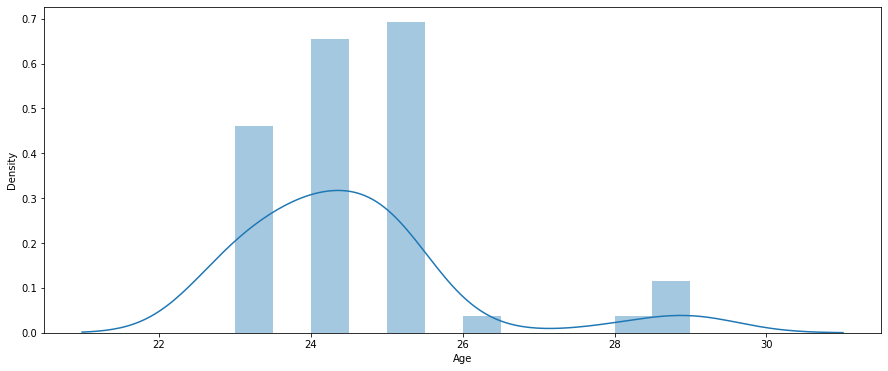

In [18]:
plt.figure(figsize=(15,6))
sns.distplot(negative_exp['Age'])

In [19]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [20]:
negative_exp.size

624

In [21]:
print("There are {} negative values for experience, approx {}%".format(negative_exp.size,negative_exp.size/df.size*100))

There are 624 negative values for experience, approx 1.04%


In [22]:
data=df.copy()

In [23]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### use numpy where function to change the negative values to mean value derived from data with the same age group

In [24]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])


In [25]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


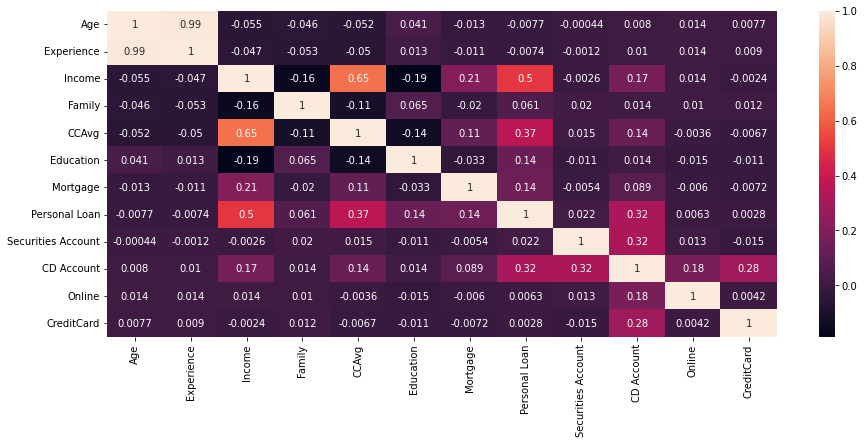

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

#### We could see that Age & Experience are very strongly correlated,
#### Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

In [27]:
data=data.drop(['Experience'],axis=1)

In [28]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
